In [46]:
import pandas as pd #data processing, importing csv file
import seaborn as sns #plot data
from wordcloud import WordCloud 
import os # accessing directory structure
import matplotlib.pyplot as plt #plotting
import re #regular expressions

In [47]:
#read data from file 
df = pd.read_csv("C:\\Users\\rosam\\Downloads\\processed_dataset.txt")
rows, columns = df.shape
print(df.shape)
df.tail()

(30000, 2)


,tweets,sentiment
29995,calumfan1 is it in any way related to photoshop,0
29996,swiz_nz really wow thats crap,0
29997,at the 2010 lexus hs250h press event again can...,0
29998,karmicunderpath ooh now there is a nice thought,1
29999,mariap91 i would usually ask you about the sun...,1


In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     30000 non-null  object
 1   sentiment  30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB
None


30000


,tweets
sentiment,
0,15000
1,15000


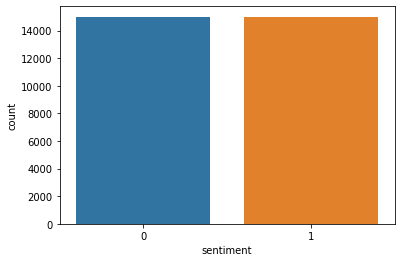

In [49]:
#plot the distribution of the dataset
sns.countplot(x='sentiment', data=df)
print(len(df['sentiment']))
df.groupby(['sentiment']).count()



In [50]:
data = df.sample(axis=0, frac=1)      #unsort data 

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

X=data['tweets']
y=data['sentiment']

#delete special characters and numbers from the tweets
X = X.apply(lambda x: re.sub (r'([^a-zA-Z ]+?)', '', x))
print(X.head())

1532     jennycakes my virtual world is sucky today wou...
1475     blogtv you lie l i love da site but the mods d...
12770    jenntheunicorn when do we get to hang out i am...
28209    savanhy omg i cannot believe you said eff off ...
6348     sai dominicanbaseball lmao no i dont but i can...
Name: tweets, dtype: object


In [52]:
#transforming each tweet into a matrix of TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features=10000, stop_words = None)
features_matrix_train = vectorizer.fit(X) # it creates a vocabulary
#print(features_matrix_train.vocabulary_)
X = vectorizer.transform(X)
print(X.shape)
#print(X)

(30000, 10000)


In [53]:
#there will be one row per word in the matrix 
df1 = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
df1.head()

c:\users\rosam\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aah,aahh,aargh,aaron,aaw,aaww,ab,abandoned,abbie,...,zip,zoe,zombie,zomg,zone,zoo,zoom,zune,zz,zzs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
from sklearn.model_selection import train_test_split
#split data between train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [55]:
#we check the performance for different functions
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)



LogisticRegression()

In [56]:
from sklearn.naive_bayes import ComplementNB
NBmodel = ComplementNB().fit(X_train,y_train)

In [ ]:
from sklearn.svm import SVC
SVC = SVC().fit(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def report(model):
    test_predict = model.predict(X_test)
    print(classification_report(y_test, test_predict))
    print(accuracy_score(y_test, test_predict))
    cf_matrix = confusion_matrix(y_test, test_predict)
    sns.heatmap(cf_matrix, annot = True)



In [ ]:
x = 'working on a friday night is so sad'
vec = vectorizer.transform([x])
print(vec)

In [ ]:
LRmodel.predict(vec)

In [ ]:
NBmodel.predict(vec)

In [ ]:
SVC.predict(vec)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1020
           1       0.75      0.76      0.76       980

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

0.762


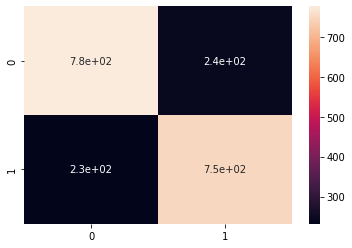

In [43]:
report(LRmodel)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1020
           1       0.76      0.76      0.76       980

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

0.7645


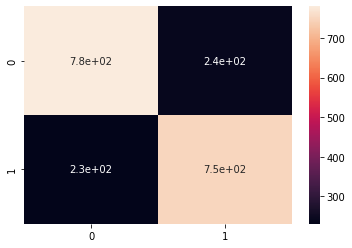

In [44]:
report(SVC)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1020
           1       0.77      0.73      0.75       980

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

0.758


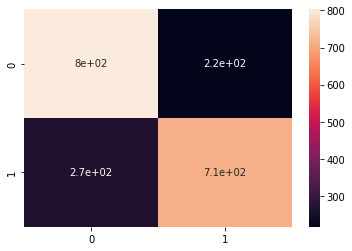

In [45]:
report(NBmodel)